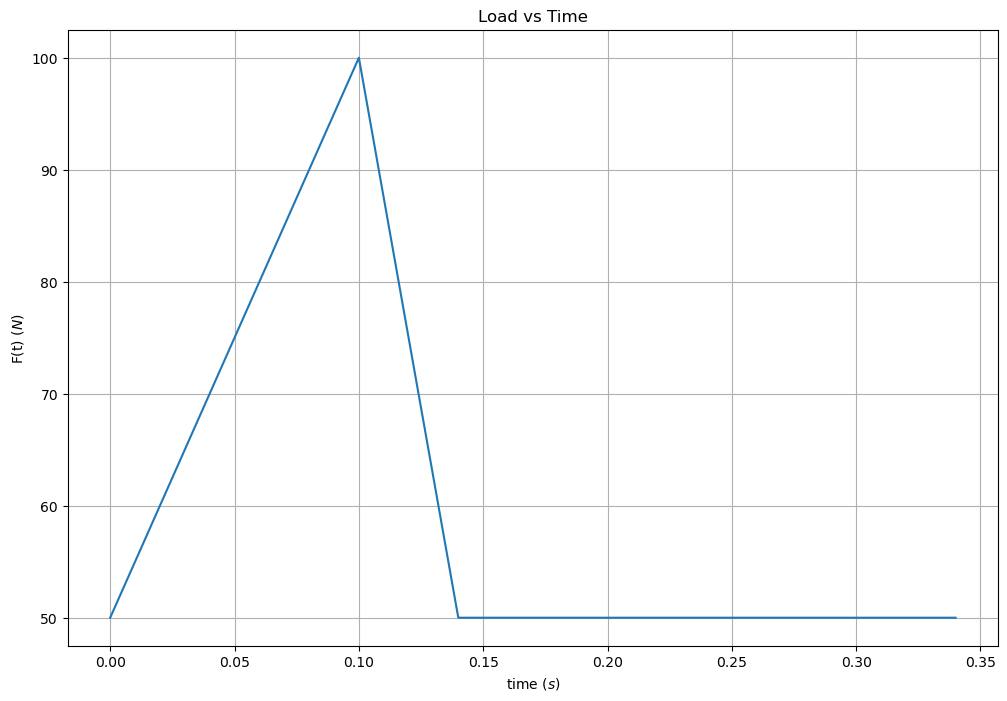

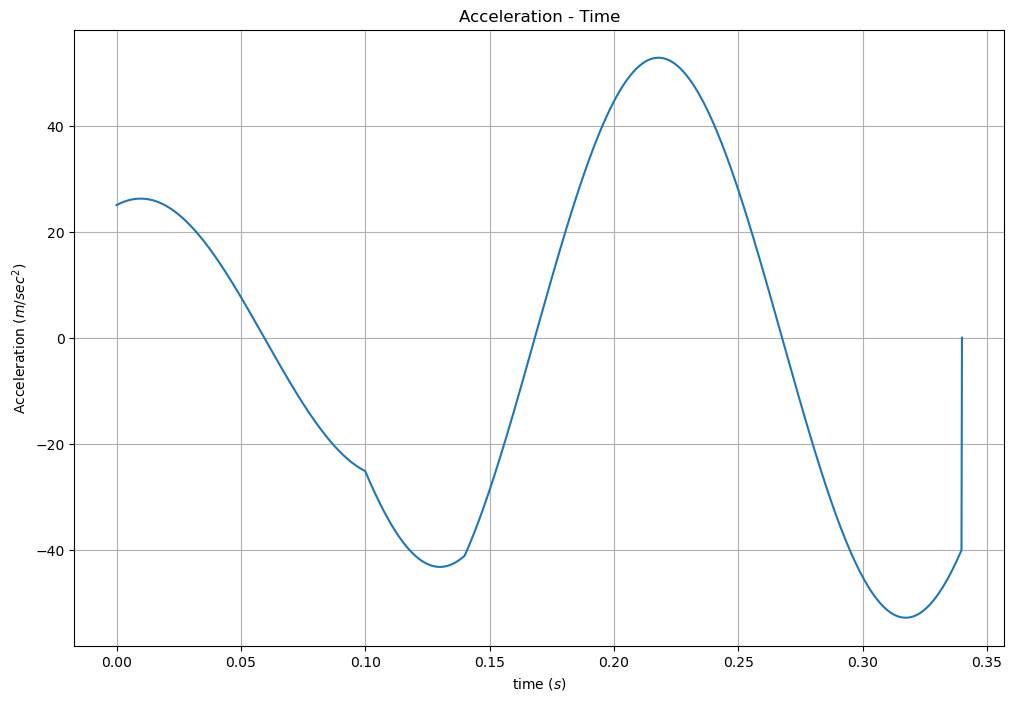

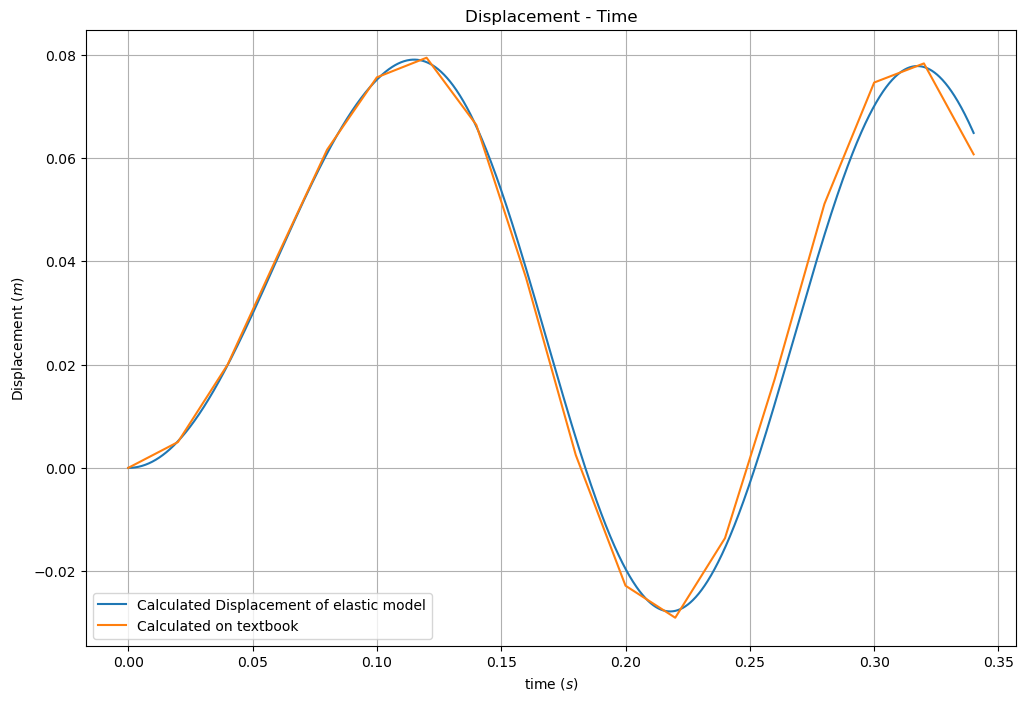

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# To calculate the natural period of time
def get_natural_period(M, k):
    term_A = (2 * np.pi * math.sqrt(M)) / math.sqrt(k)
    return term_A

# To calculate the load against the time of application of load
def get_load_value(x):
    if x >= range_a_start and x <= range_a_end:
        term_B = (500 * x) + 50
        return term_B
    elif x > range_b_start and x <= range_b_end:
        term_B = (-1250 * x) + 225
        return term_B
    else:
        return 50

# Material properties
k = 2000        # stiffness of the spring (N/m)
W = 2 * 32.2    # Weight of the beam (N)
M = 2           # Mass of beam (kg)

# Calculation of time step
T = 0.34         # total time (sec)
reduction_factor = 0.001

natural_period = get_natural_period(M, k)               # Calculate the natural period of time
delta_t = natural_period * reduction_factor             # Apply reduction factor and calculate the time step delta t
n_t_steps = int((T / delta_t))                          # number of time steps
t = np.linspace(0, T, n_t_steps)                        # initialise the time domain

# Load domain data
range_a_start = 0.0                                     # Linear Load line initial limit
range_a_end = 0.10                                      # Linear Load line final limit
range_b_start = 0.10                                    # Linear Load line initial limit
range_b_end = 0.14                                      # Linear Load line final limit

Load = np.array(list(map(get_load_value, t)))

# Displacement calculation iterations
Disp = np.zeros(n_t_steps)                              # Initialising displacement array
Acc = np.zeros(n_t_steps)                               # Initialising acceleration array

# Initial conditions
Disp[0] = 0
Acc[0] = (Load[0] / M) - (k * Disp[0])

for count in range(0, n_t_steps - 1):
    # Initial value of disp
    if count == 0:
        Disp[count + 1] = (0.5 * Acc[count]) * delta_t * delta_t
    Acc[count] = ((Load[count]) - (k * Disp[count])) / M
    # Remaining value of disp
    if count > 0 and count <= (n_t_steps - 2):
        Disp[count + 1] = (2 * Disp[count]) - Disp[count - 1] + (Acc[count] * delta_t * delta_t)


t_1 = np.arange(0, 0.34+0.02, 0.02)
# Define the y array
y = [0, 0.005, 0.02, 0.041, 0.0616, 0.0756, 0.0794, 0.0664, 0.0368, 0.0025, -0.0228, -0.029, -0.0136, 0.0172, 0.0511, 0.0746, 0.0783, 0.0607]

# Load Time Graph
plt.figure(figsize=(12, 8))
plt.plot(t, Load)
plt.xlabel('time ($s$)')
plt.ylabel('F(t) ($N$)')
plt.title('Load vs Time')
plt.grid()
plt.show()

# Plot acceleration
plt.figure(figsize=(12, 8))
plt.plot(t, Acc)
plt.xlabel('time ($s$)')
plt.ylabel('Acceleration ($m/sec^2$)')
plt.title('Acceleration - Time')
plt.grid()
plt.show()

# Plot Displacement
plt.figure(figsize=(12, 8))
plt.plot(t, Disp, label='Calculated Displacement of elastic model')
plt.plot(t_1, y[:len(t_1)], label='Calculated on textbook')
plt.xlabel('time ($s$)')
plt.ylabel('Displacement ($m$)')
plt.title('Displacement - Time')
plt.legend()
plt.grid()
plt.show()


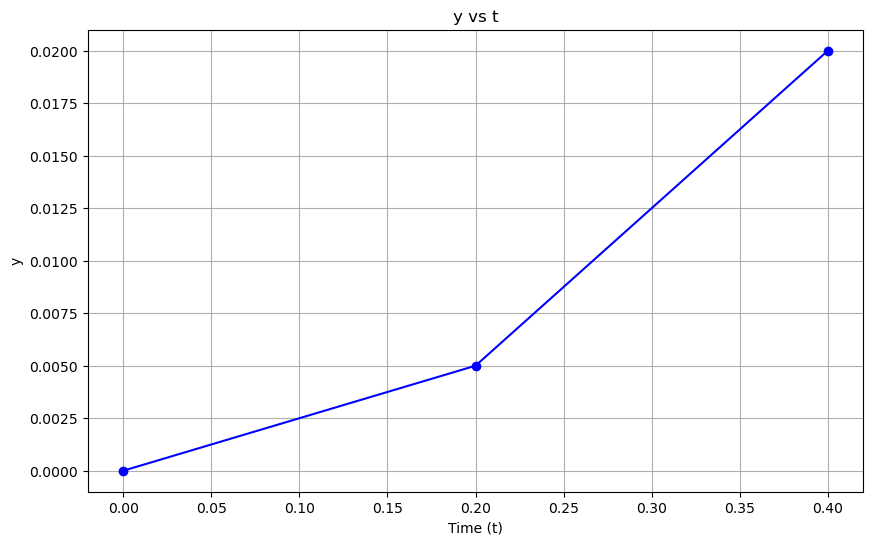

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time array
t = np.arange(0, 0.34 + 0.2, 0.2)

# Define the y array
y = [0, 0.005, 0.02, 0.041, 0.0616, 0.0756, 0.0794, 0.0664, 0.0368, 0.0025, -0.0228, -0.029, -0.0136, 0.0172, 0.0511, 0.0746, 0.0783, 0.0607]

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(t, y[:len(t)], marker='o', linestyle='-', color='b')
plt.title('y vs t')
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.grid(True)
plt.show()
